#### Overview 
First box 



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
import json 
import os
from pathlib import Path

### Code at end to check/visualise data loaded for the patient
The part 'sub-008_cleaned-epo.fif' the 008 part can be changed to another subject e.g 'sub-011_cleaned-epo.fif' 
and it will start looking at that subjects cleaned data instead. 

In [3]:
cleaned_epochs_fname = Path('..') / 'EEG_data' / 'cleaned_data' / 'sub-008_cleaned-epo.fif'

epochs = mne.read_epochs(cleaned_epochs_fname, preload=True)

df = epochs.to_data_frame()

Reading /Users/katieoreilly/Desktop/unsw/SCIF_2001_actual2.nosync/SCIF_2001/notebooks/../EEG_data/sub-008_cleaned-epo.fif ...
    Found the data of interest:
        t =       0.00 ...   30000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1427 matching events found
No baseline correction applied
0 projection items activated


### Visualising the EEG signals over a time period 
This actually allows you to see the EEG signal, you can change the range(599,600) part to show accross different epochs of time for exampel range(410,415) will visualise 5 30 second increments of data strung together into one graph. 

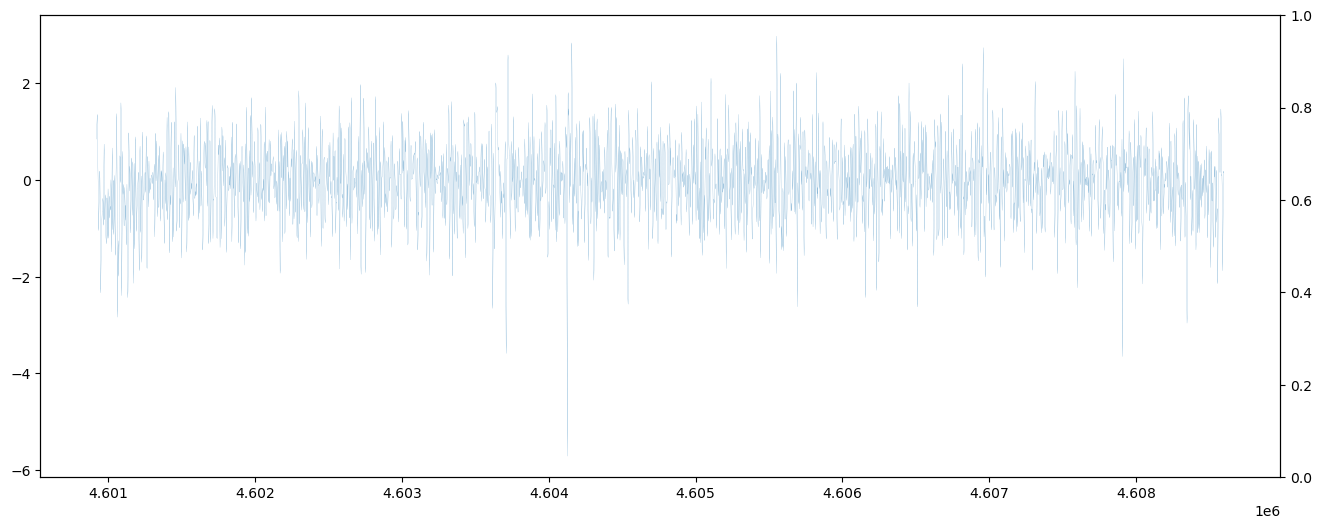

In [6]:
fig, ax = plt.subplots(figsize=(16, 6))
axr = ax.twinx()

sub_df = df[df['epoch'].isin(range(599, 600))].copy()
# sub_df['is_wake'] = sub_df['condition'] == 'Wake'

ax.plot(sub_df['EMG2:EMG3'], lw=0.1)
# axr.plot(sub_df['is_wake'], color='red')

In [8]:
df

,time,condition,epoch,EOG2:A1,EOG1:A2,F4:A1,F3:A2,C3:A2,C4:A1,O2:A1,O1:A2,EMG1:EMG3,EMG2:EMG3,ECG II
0,0.000000,A,0,-1.232955,3.234604,0.932848,-0.906843,-0.555863,0.421605,0.153911,-0.267679,-0.004686,-0.004572,0.000933
1,0.003906,A,0,-1.232650,3.247516,0.938436,-0.907347,-0.555765,0.424940,0.156416,-0.267416,-0.004327,-0.004195,0.000719
2,0.007812,A,0,-1.231817,3.260653,0.944076,-0.907649,-0.555689,0.428591,0.159000,-0.267174,-0.004410,-0.004210,0.000489
3,0.011719,A,0,-1.230970,3.273772,0.949720,-0.907943,-0.555609,0.432249,0.161594,-0.266929,-0.004682,-0.004250,0.000516
4,0.015625,A,0,-1.229773,3.286953,0.955411,-0.908123,-0.555515,0.436249,0.164333,-0.266829,-0.004711,-0.004039,0.000757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10960782,29.984375,Wake,1426,-3.900999,17.336189,15.844267,9.200404,4.006019,8.248055,-3.682169,-4.851176,-4.672176,-1.534729,-5.960742
10960783,29.988281,Wake,1426,-2.808100,17.629921,16.856041,8.405101,3.532917,10.463939,-1.831180,-4.731299,-4.065660,-1.745662,-9.614332
10960784,29.992188,Wake,1426,-1.589494,18.471950,17.540859,7.867941,3.396004,11.976464,-0.310516,-4.297693,-2.673770,-1.510992,-11.516272
10960785,29.996094,Wake,1426,-0.400786,19.676182,17.684072,7.670598,3.495699,12.435212,0.614678,-3.451645,-0.992152,-0.935386,-10.341341
